# Datasets and grouping 

The functionality we have covered so far is fantastic, but what if we want to group arrays together in some kind of coherent way?

Don't worry `xarray` has us covered with a `Dataset`. Lets make a few arrays and combine them in a dataset.

In [76]:
import xarray as xr
import numpy as np

## One dimensional example

We are going to start with a dataset that shares a single dimension just to get the hang of how datasets work.

Our problem statement is that have several harmonic oscillator, modelling several springs, and we want to keep track of their motion over time. The motion of a harmonic oscillator is given by:

$ x(t) = A cos({\omega t + \phi}) $

Where $A$ is the amplitude, $\omega$ is the angular frequency and $\phi$ is the phase shift. These values are determined by the initial positions and velocities of the spring as well as the mass and stiffness of  the spring, but lets not get too into that, the primary purpose here is to learn how we are going to deal with our dataset using xarray!

First lets define a function that propogates our harmonic oscillator over time:

In [77]:
def harmonic(A,t,omega,phi):
    x_t = A*np.cos(omega*t + phi)
    return x_t

Okay now lets make a time domain for us to propogate over

In [91]:
npoints = 1000
time_domain = xr.DataArray(np.arange(npoints), dims=("t"), coords={"t":np.arange(npoints)})
time_domain

<xarray.DataArray (t: 1000)>
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
...
       741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753,
       754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766,
       767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779,
       780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792,
       793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805,
       806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818,
       819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831,
       832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844,
       845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857,
       858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870,
       871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883,
       884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896,
       897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909,
       910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922,
       923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935,
       936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948,
       949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961,
       962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974,
       975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987,
       988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 ... 991 992 993 994 995 996 997 998 999

In [92]:
#initial conditions
A = 100
omega = 0.1
phi = 0.1


Once again we use the very handy `xr.apply_ufunc` to apply our function in a vectorised way accross our domain.

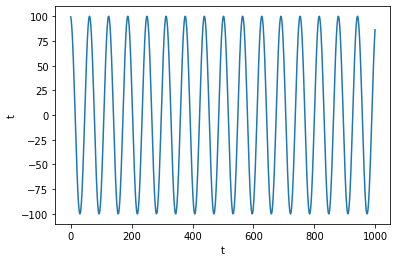

In [94]:
result = xr.apply_ufunc(harmonic,A,time_domain.t,omega,phi)
result.plot()

Okay cool! That looks a lot like harmonic oscillation. Now lets make a **collection** of them with random intial conditions!

In [96]:
oscillators = {}

n_oscillators = 100

for i in range(n_oscillators):
    
    #initial conditions
    A = np.random.rand()*100
    omega = np.random.rand()
    phi = np.random.rand()
    
    # apply over array
    result = xr.apply_ufunc(harmonic,A,time_domain.t,omega,phi)
    
    # add metadata
    result.attrs["A"] = A
    result.attrs["phi"] = phi
    result.attrs["omega"] = omega
    
    tag = "oscillator_" + str(i)
    oscillators[tag] = result

Lets plot an oscillator in our dictionary of oscillators

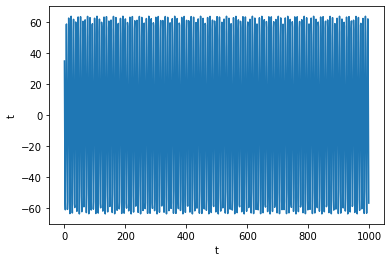

In [97]:
oscillators["oscillator_6"].plot()

Okay this is good but our oscillators actually the **same time axis**. This is the core of the xarray dataset concept, arrays with the same **named dimensions** share a coordinate system. 

Lets turn our `dict` of oscillators into a `DataSet` and play around with it a bit. Make sure to expand the `Data Variables` tab to have a look at our 100 oscillators.

In [99]:
dataset = xr.Dataset(data_vars=oscillators)
dataset

<xarray.Dataset>
Dimensions:        (t: 1000)
Coordinates:
  * t              (t) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
Data variables: (12/100)
    oscillator_0   (t) float64 51.0 14.9 -30.99 -56.52 ... -56.94 -42.98 -0.7871
    oscillator_1   (t) float64 69.58 50.25 22.68 -8.623 ... 29.15 55.28 72.34
    oscillator_2   (t) float64 73.56 60.18 33.64 -0.254 ... 66.58 74.49 66.1
    oscillator_3   (t) float64 70.64 51.07 4.059 -45.13 ... 60.85 20.03 -31.55
    oscillator_4   (t) float64 36.88 -7.096 -46.55 ... -42.35 -57.27 -35.73
    oscillator_5   (t) float64 32.41 2.814 -27.88 -47.7 ... 41.66 50.88 40.25
    ...             ...
    oscillator_94  (t) float64 78.55 77.78 77.0 76.2 ... 82.26 81.56 80.84 80.11
    oscillator_95  (t) float64 63.43 40.81 -0.9198 -42.22 ... 38.29 62.75 57.83
    oscillator_96  (t) float64 66.73 37.8 -22.48 -64.12 ... 63.58 20.74 -39.31
    oscillator_97  (t) float64 31.33 29.12 26.8 24.38 ... 25.82 28.18 30.44
    oscillator_98  (t) float64 32.75 18.06 0.5632 -17.02 ... 42.63 33.28 18.76
    oscillator_99  (t) float64 30.8 20.13 7.798 -5.173 ... 14.17 25.79 35.28

In [84]:
dataset["oscillator_6"] # a dataset is a dictionary-like container

<xarray.DataArray 'oscillator_6' (time: 1000)>
array([ 96.52646468,  89.67680965,  79.00982497,  64.97957893,
        48.18330592,  29.33598356,   9.23989777, -11.24950861,
       -31.26005002, -49.93992504, -66.49397559, -80.21753489,
       -90.52642348, -96.98181636, -99.30892273, -97.40868317,
       -91.36198638, -81.42622595, -68.0243437 , -51.72682604,
       -33.22741976, -13.31360082,   7.16694662,  27.34241409,
        46.35397967,  63.39236599,  77.73228924,  88.76333281,
        96.01593127,  99.18135866,  98.12487023,  92.89143818,
        83.70383734,  70.95316215,  55.18217868,  37.0622204 ,
        17.36461106,  -3.07216869, -23.37817349, -42.68902474,
       -60.18270519, -75.11455024, -86.84894657, -94.88638868,
       -98.88474168, -98.67380514, -94.26255812, -85.83877698,
       -73.76104216, -58.54347424, -40.83384912, -21.38602363,
        -1.0278457 ,  19.37408519,  38.9513071 ,  56.87046401,
        72.36877979,  84.7865278 ,  93.59511388,  98.41957737,
        99.05455225,  95.47300916,  87.8274059 ,  76.44319774,
        61.80498347,  44.53587725,  25.37098408,   5.12610814,
       -15.3369741 , -35.14719763, -53.4612881 , -69.499658  ,
       -82.57959185, -92.14430782, -97.78665857, -99.26646258,
       -96.52072809, -89.66633453, -78.9950572 , -64.96114716,
...
       -31.53748957, -50.19248585, -66.71090674, -80.38960213,
       -90.64630232, -97.04440384, -99.31155465, -97.35124749,
       -91.24692801, -81.25844265, -67.8109776 , -51.47695964,
       -32.95168928, -13.02374345,   7.45859233,  27.62343348,
        46.61241041,  63.61720729,  77.91397014,  88.89411958,
        96.09025663,  99.19605876,  98.07931931,  92.78757524,
        83.54608359,  70.74823278,  54.93879705,  36.79074669,
        17.07660128,  -3.36445466, -23.66229373, -42.95288492,
       -60.4150734 , -75.30553512, -86.99041835, -94.97232524,
       -98.9114849 , -98.64021662, -94.17006765, -85.69132166,
       -73.56489881, -58.30699223, -40.56709491, -21.10035233,
        -0.73541766,  19.660822  ,  39.22014697,  57.10996307,
        72.56874312,  84.93844345,  93.69251515,  98.45831811,
        99.03298338,  95.3920488 ,  87.69050035,  76.25617473,
        61.57580414,  44.27429722,  25.0881382 ,   4.83403648,
       -15.62583874, -35.42055896, -53.70750978, -69.70825895,
       -82.74169243, -92.25300779, -97.83733082, -99.25695012,
       -96.45143584, -89.54021209, -78.81747332, -64.73966115,
       -47.90603475, -29.03316177,  -8.92441576,  11.56422151,
        31.56059722,  50.21351297,  66.72895825,  80.40390962])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Attributes:
    A:        99.31436852385691
    phi:      0.2375029790059593
    omega:    0.20668695592220876

Note that we recorded the values of our variables in our model as `attrs` on each `DataArray`

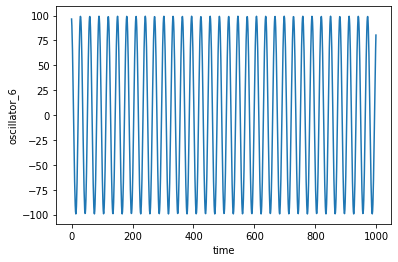

In [85]:
dataset.oscillator_6.plot()

Ok cool, we can play with our dataset nicely.

Now lets use the power of the `Dataset` and its shared coordinate axes. We are going to find the largest oscillator positions away from the equilibrium position (0) accross **all of our oscillators**.

In [119]:
# works accross our 100 arrays
np.abs(dataset).max()

<xarray.Dataset>
Dimensions:        ()
Data variables: (12/100)
    oscillator_0   float64 57.3
    oscillator_1   float64 77.59
    oscillator_2   float64 74.49
    oscillator_3   float64 70.64
    oscillator_4   float64 57.45
    oscillator_5   float64 50.89
    ...             ...
    oscillator_94  float64 99.33
    oscillator_95  float64 64.57
    oscillator_96  float64 66.75
    oscillator_97  float64 47.11
    oscillator_98  float64 45.41
    oscillator_99  float64 45.25

Awesome work! We now know how to work with a `Dataset`, even if this one is rather simple and only has one shared dimension. We will soon work with one that has more complexity and more shared dimensions. 

We can save our dataset to a netcdf file using a similar API to what we used for a `DataArray`

In [120]:
dataset.to_netcdf("oscillators.nc")

In [121]:
reloaded = xr.open_dataset("oscillators.nc")

In [122]:
reloaded["oscillator_6"]

<xarray.DataArray 'oscillator_6' (t: 1000)>
array([ 34.935912, -14.804579, -55.286474, ...,  32.098142, -18.026987,
       -56.878267])
Coordinates:
  * t        (t) int32 0 1 2 3 4 5 6 7 8 ... 991 992 993 994 995 996 997 998 999
Attributes:
    A:        72.73640842809777
    phi:      0.8351117171269111
    omega:    0.5026926665434582